In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

hobart


## Perform API Calls

In [39]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Initialize pandas data frame with cities array
cities_df = pd.DataFrame(columns=['City','Lat','Long','Temp','Humidity','Cloudiness','Wind Speed'])
cities_df['City'] = cities

# Build cities data frame
for index,row in cities_df.iterrows():
    
    # Add city to url
    url = base_url + "&q=" + row['City']
    
    # API response  
    try:
        response = requests.get(url).json()
        cities_df.loc[index,'Lat'] = response['coord']['lat'] 
        cities_df.loc[index,'Long'] = response['coord']['lon'] 
        cities_df.loc[index,'Temp'] = response['main']['temp'] 
        cities_df.loc[index,'Humidity'] = response['main']['humidity'] 
        cities_df.loc[index,'Cloudiness'] = response['clouds']['all'] 
        cities_df.loc[index,'Wind Speed'] = response['wind']['speed']
    except:
       print(f"{row['City']} not found.")
              

taolanaro not found.
mys shmidta not found.
amderma not found.
illoqqortoormiut not found.
amparai not found.
barentsburg not found.
chokwe not found.
belushya guba not found.
kazalinsk not found.
nizhneyansk not found.
samusu not found.
sogdiondon not found.
kuala krai not found.
kobojango not found.
dzhusaly not found.
attawapiskat not found.
domoni not found.
mustafakemalpasa not found.
kadykchan not found.
meyungs not found.
halalo not found.
odweyne not found.
karamay not found.
utiroa not found.
toliary not found.
balimo not found.
qui nhon not found.
tlahualilo not found.
vaitupu not found.
palabuhanratu not found.
tsihombe not found.
chagda not found.
kawana waters not found.
falealupo not found.
bengkulu not found.
armacao dos buzios not found.
kyra not found.
saleaula not found.
karauzyak not found.
maghama not found.
marcona not found.
grand river south east not found.
sentyabrskiy not found.
cheuskiny not found.
acarau not found.
karakendzha not found.
navapur not found.
ya

In [40]:
cities_df.head()

,City,Lat,Long,Temp,Humidity,Cloudiness,Wind Speed
0,hobart,-42.88,147.33,46.4,65,75,3.36
1,ocos,14.51,-92.19,93.2,46,40,6.93
2,hami,42.84,93.51,64.97,48,0,1.48
3,platteville,42.73,-90.48,70.99,100,90,12.75
4,port elizabeth,39.31,-74.98,75.49,69,90,9.17


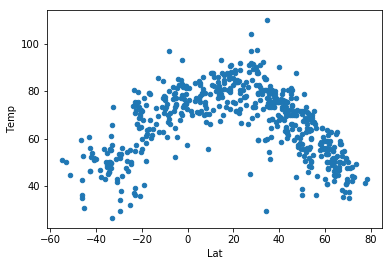

In [43]:
# Convert columns to numeric
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Temp'] = pd.to_numeric(cities_df['Temp'])
cities_df.plot(kind='scatter',x='Lat',y='Temp')